In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import Image


Begin by taking an overview of the houses dat stored in information_hoseholds

In [3]:
household_data = pd.read_csv('../informations_households.csv')

In [3]:
household_data.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [4]:
print(household_data.Acorn_grouped.unique())
print(household_data.stdorToU.unique())

['ACORN-' 'Affluent' 'Comfortable' 'Adversity' 'ACORN-U']
['ToU' 'Std']


The Acorn user group classifies the UK demographics into different demographic types ranging from Adversity groups to Affluent. The second column details what type of payment scheme the household was put on, with Std being a flat rate for energy cost, and ToU a Time of Use scheme, where customers are told at what time they will pay what price

In [5]:
homedf = pd.read_csv('../daily_dataset/daily_dataset/block_24.csv')


In [6]:
print(homedf.shape)
print(homedf.describe())
homedf.head()


(32783, 9)
       energy_median   energy_mean    energy_max  energy_count    energy_std  \
count   32783.000000  32783.000000  32783.000000  32783.000000  32688.000000   
mean        0.171266      0.239776      1.004788     47.816124      0.211120   
std         0.190051      0.217244      0.808857      2.682868      0.175572   
min         0.000000      0.000000      0.000000      1.000000      0.000000   
25%         0.062000      0.100177      0.420000     48.000000      0.087120   
50%         0.110000      0.179521      0.810000     48.000000      0.162335   
75%         0.211000      0.304917      1.369000     48.000000      0.289883   
max         4.121000      4.135375      5.734000     48.000000      1.912768   

         energy_sum    energy_min  
count  32783.000000  32783.000000  
mean      11.462693      0.061012  
std       10.409855      0.085785  
min        0.000000      0.000000  
25%        4.781500      0.023000  
50%        8.577000      0.039000  
75%       14.587

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000152,2011-11-23,0.1725,0.248708,0.798,24,0.193996,5.969,0.055
1,MAC000152,2011-11-24,0.1250,0.174875,0.611,48,0.130562,8.394,0.036
2,MAC000152,2011-11-25,0.1015,0.164542,0.794,48,0.175502,7.898,0.025
3,MAC000152,2011-11-26,0.1320,0.189042,0.724,48,0.153574,9.074,0.044
4,MAC000152,2011-11-27,0.1170,0.196271,0.662,48,0.157186,9.421,0.030


The energy units are given KWh. We review basic trends:


In [7]:
print('First day = {}'.format(homedf.day.min()))

print('Last day = {}'.format(homedf.day.max()))
homedf['day'] = pd.to_datetime(homedf['day'])
x_dates = homedf['day'].dt.strftime('%Y-%m-%d').sort_values().unique()
# ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

First day = 2011-11-23
Last day = 2014-02-28


In [8]:
freq = int(100) #change frequency of tick label
homedf.iloc[::freq].day.dt.date

0        2011-11-23
100      2012-03-02
200      2012-06-10
300      2012-09-18
400      2012-12-27
            ...    
32300    2012-11-03
32400    2013-02-11
32500    2013-05-22
32600    2013-08-30
32700    2013-12-08
Name: day, Length: 328, dtype: object

/var/folders/jv/696nrhfx6dg8vqvjnygmgx880000gn/T/ipykernel_20080/509777869.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(homedf.iloc[::freq].day.dt.date)


[Text(15340.0, 0, '2011-11-23'),
 Text(15431.0, 0, '2012-03-02'),
 Text(15522.0, 0, '2012-06-10'),
 Text(15614.0, 0, '2012-09-18'),
 Text(15706.0, 0, '2012-12-27'),
 Text(15796.0, 0, '2013-04-06'),
 Text(15887.0, 0, '2013-07-15'),
 Text(15979.0, 0, '2013-10-23'),
 Text(16071.0, 0, '2014-01-31'),
 Text(16161.0, 0, '2012-02-02')]

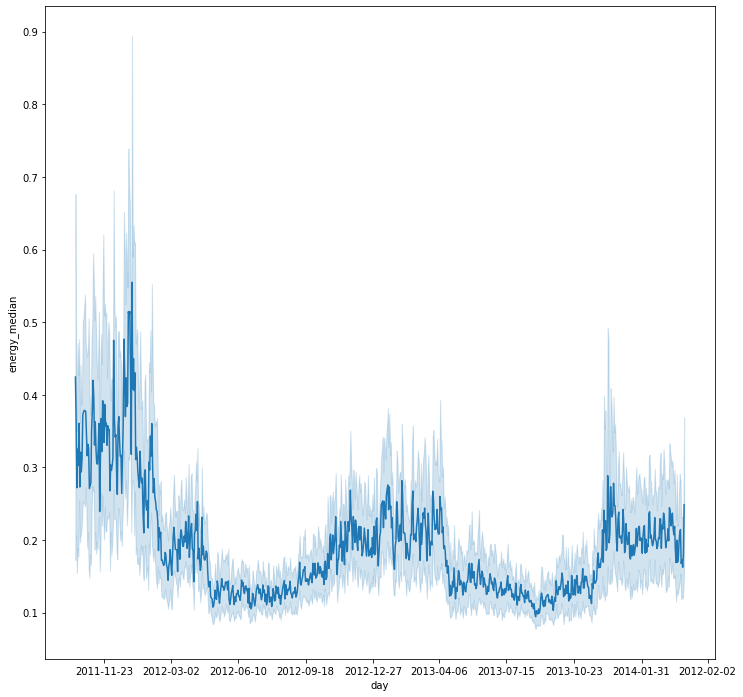

In [9]:

fig, ax = plt.subplots(figsize = (12,12))
sns.lineplot(ax = ax, x = 'day',y = 'energy_median',data = homedf)
ax.set_xticklabels(homedf.iloc[::freq].day.dt.date)


In [11]:
n=111 #Look at 10 blocks
houseblock = homedf
for block in range(n):
    newblock = pd.read_csv('../daily_dataset/daily_dataset/block_'+str(block)+'.csv')
    houseblock = pd.concat([houseblock, newblock],axis =0)

In [12]:
houseblock.LCLid.nunique() #5550 unique homes

5550

In [13]:
home_joined = pd.merge(houseblock,household_data, on = 'LCLid',how='left')

home_joined.day = pd.to_datetime(home_joined.day)
home_joined.head()


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000152,2011-11-23,0.1725,0.248708,0.798,24,0.193996,5.969,0.055,Std,ACORN-E,Affluent,block_24
1,MAC000152,2011-11-24,0.1250,0.174875,0.611,48,0.130562,8.394,0.036,Std,ACORN-E,Affluent,block_24
2,MAC000152,2011-11-25,0.1015,0.164542,0.794,48,0.175502,7.898,0.025,Std,ACORN-E,Affluent,block_24
3,MAC000152,2011-11-26,0.1320,0.189042,0.724,48,0.153574,9.074,0.044,Std,ACORN-E,Affluent,block_24
4,MAC000152,2011-11-27,0.1170,0.196271,0.662,48,0.157186,9.421,0.030,Std,ACORN-E,Affluent,block_24


In [14]:
home_joined['stdorToU']

0          Std
1          Std
2          Std
3          Std
4          Std
          ... 
3533303    Std
3533304    Std
3533305    Std
3533306    Std
3533307    Std
Name: stdorToU, Length: 3533308, dtype: object

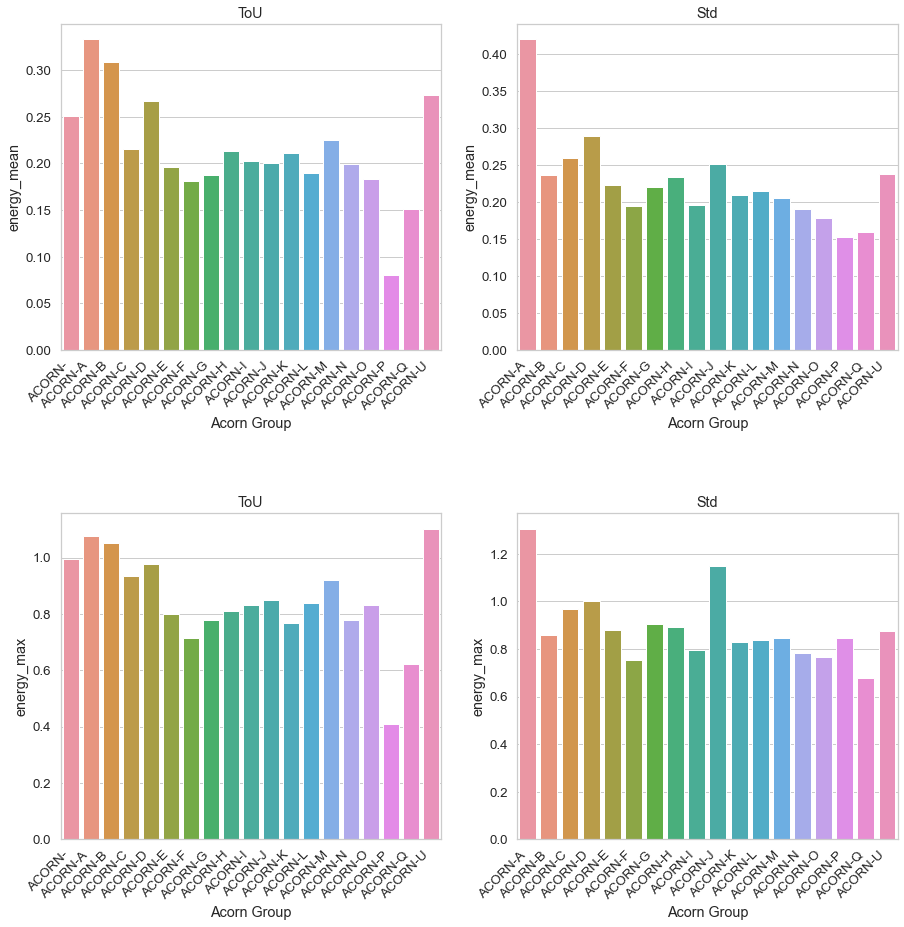

In [15]:
sns.set(font_scale=1.2)  # crazy big
sns.set_style('whitegrid')

def demographic_trends_facet_plot(trend1 = 'energy_mean', trend2 = 'energy_max'):
    fig, ax = plt.subplots(2,2, figsize = (15,15))
    fig.subplots_adjust(hspace = .5, wspace=0.2)

    axs = ax.ravel()
    i=0
    for aggregate_function in [trend1,trend2]:
        for energy_plan in ['ToU','Std']:
            home_energyplan = home_joined[home_joined['stdorToU'] == energy_plan]
            aggdata = home_energyplan.groupby('Acorn')[aggregate_function].agg('mean')
            aggdata = aggdata.reset_index()
            bp = sns.barplot(ax = axs[i],x = 'Acorn',y = aggregate_function,data =aggdata)
            bp.set_xticklabels(bp.get_xticklabels(), 
                              rotation=45, 
                              horizontalalignment='right')
            axs[i].set_title(energy_plan)
            axs[i].set_xlabel('Acorn Group')
            i+=1


demographic_trends_facet_plot()

[Text(0, 0.5, 'Avg energy consumption')]

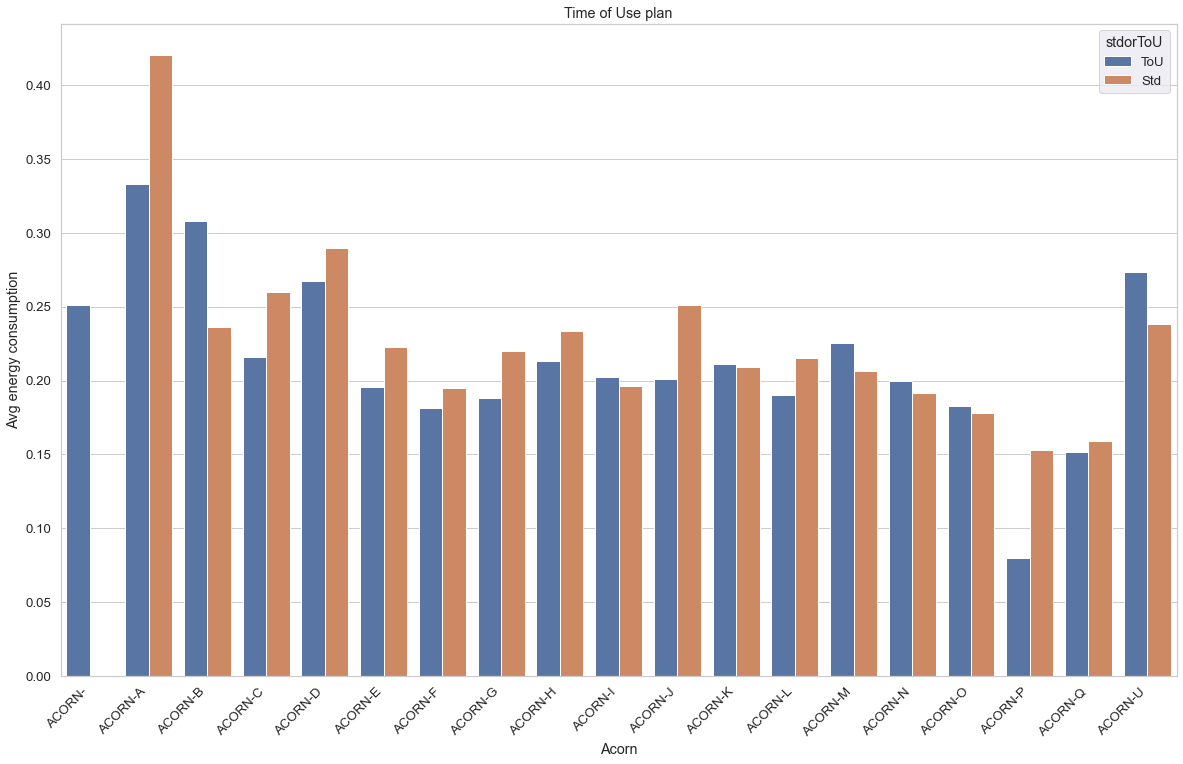

In [16]:
aggdata = home_joined.groupby(['Acorn','stdorToU'])['energy_mean'].agg('mean').reset_index()
fig,ax = plt.subplots(figsize = (20,12))
sns.set(font_scale=1.2)  # crazy big
plt.title('Time of Use plan')


bp = sns.barplot(ax = ax,x = 'Acorn',y = 'energy_mean',hue = 'stdorToU',data =aggdata)
bp.set_xticklabels(bp.get_xticklabels(),       rotation=45,       horizontalalignment='right')  #bp.get_xticklabels()

ax.set( ylabel='Avg energy consumption')

      Acorn stdorToU  energy_mean
1   ACORN-A      Std     0.420288
2   ACORN-A      ToU     0.333104
3   ACORN-B      Std     0.236454
4   ACORN-B      ToU     0.308254
5   ACORN-C      Std     0.259652
6   ACORN-C      ToU     0.215644
7   ACORN-D      Std     0.289539
8   ACORN-D      ToU     0.267388
9   ACORN-E      Std     0.222959
10  ACORN-E      ToU     0.195662
11  ACORN-F      Std     0.195231
12  ACORN-F      ToU     0.181468
13  ACORN-G      Std     0.219821
14  ACORN-G      ToU     0.188034
15  ACORN-H      Std     0.233832
16  ACORN-H      ToU     0.213135
17  ACORN-I      Std     0.196426
18  ACORN-I      ToU     0.202201
19  ACORN-J      Std     0.251362
20  ACORN-J      ToU     0.200941
21  ACORN-K      Std     0.209008
22  ACORN-K      ToU     0.210932
23  ACORN-L      Std     0.215071
24  ACORN-L      ToU     0.190176
25  ACORN-M      Std     0.206139
26  ACORN-M      ToU     0.225360
27  ACORN-N      Std     0.191274
28  ACORN-N      ToU     0.199469
29  ACORN-O   

Text(0.5, 1.0, 'Change in Consuption after Change in Subscription from Std to ToU')

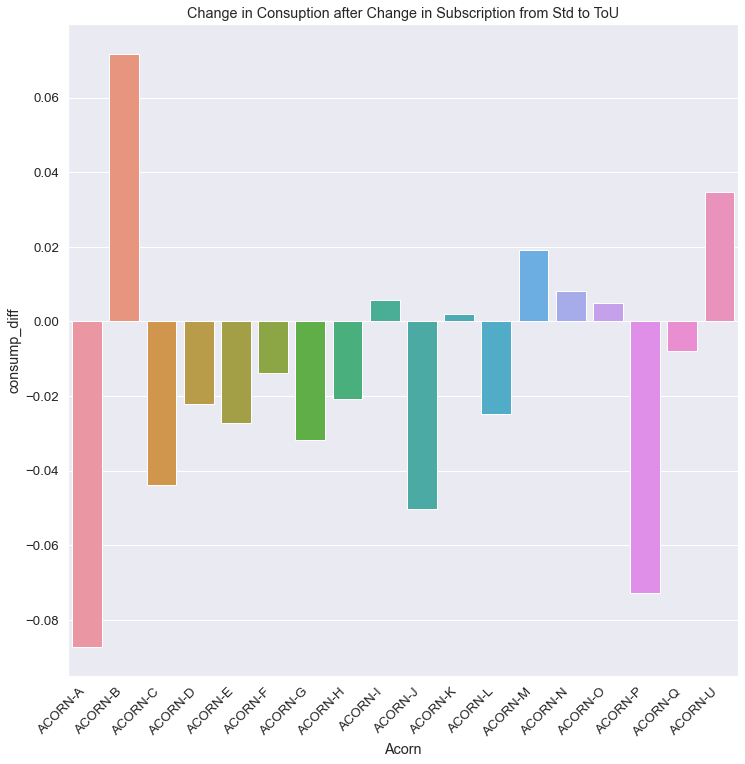

In [17]:
aggdata = aggdata[aggdata['Acorn'] != 'ACORN-']
Std = aggdata.loc[aggdata['stdorToU'] == 'Std']
ToU = aggdata.loc[aggdata['stdorToU'] == 'ToU']
print(aggdata)
df = pd.merge(Std,ToU, on = 'Acorn', how = 'outer', suffixes = ('_Std','_ToU'))
df['consump_diff'] =  df.energy_mean_ToU - df.energy_mean_Std
fig,ax =plt.subplots(figsize = (12,12))
bp = sns.barplot(ax = ax, x = 'Acorn', y = 'consump_diff', data = df)
                     
bp.set_xticklabels(bp.get_xticklabels(), 
      rotation=45, 
      horizontalalignment='right')
ax.set_title('Change in Consuption after Change in Subscription from Std to ToU')

# Forecasting

# Checking distribution of time data

In [18]:
tempforecast = pd.read_csv('../weather_hourly_darksky.csv')
print(tempforecast.shape)
tempforecast.head()
tempforecast.time = pd.to_datetime(tempforecast.time)

(21165, 12)


<AxesSubplot:xlabel='time'>

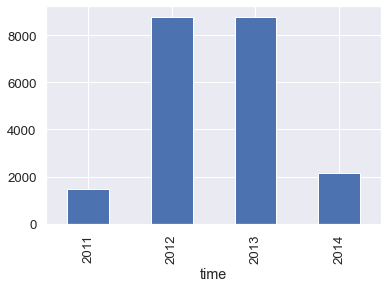

In [19]:
tempforecast.groupby([tempforecast['time'].dt.year]).count()['visibility'].plot(kind="bar")


In [20]:
years = [2012,2013]
tempforecast = tempforecast.loc[tempforecast.time.dt.year.isin(years)]

<AxesSubplot:ylabel='Density'>

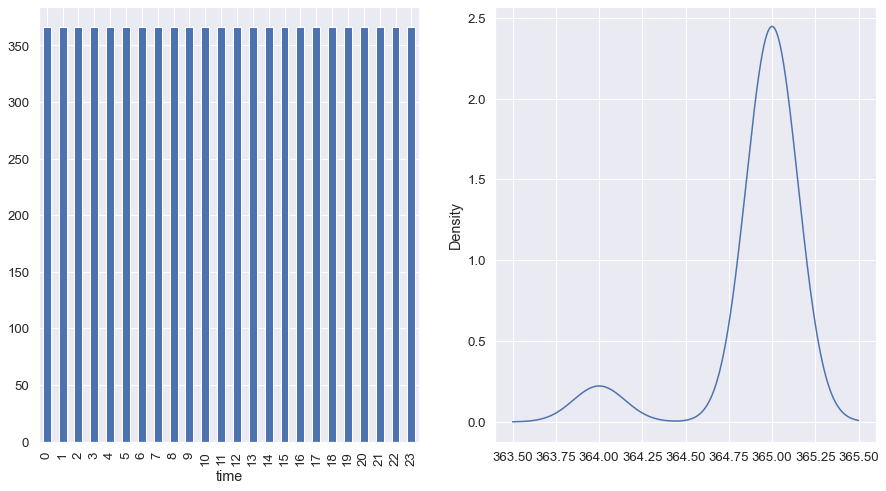

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15,8))
tempforecast.loc[tempforecast.time.dt.year == 2012].groupby([tempforecast['time'].dt.hour])['visibility'].count().plot(ax = ax[0],kind='bar')
tempforecast.loc[tempforecast.time.dt.year == 2013].groupby([tempforecast['time'].dt.hour])['visibility'].count().plot(ax = ax[1],kind = 'kde')



In [22]:
home_joined.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000152,2011-11-23,0.1725,0.248708,0.798,24,0.193996,5.969,0.055,Std,ACORN-E,Affluent,block_24
1,MAC000152,2011-11-24,0.1250,0.174875,0.611,48,0.130562,8.394,0.036,Std,ACORN-E,Affluent,block_24
2,MAC000152,2011-11-25,0.1015,0.164542,0.794,48,0.175502,7.898,0.025,Std,ACORN-E,Affluent,block_24
3,MAC000152,2011-11-26,0.1320,0.189042,0.724,48,0.153574,9.074,0.044,Std,ACORN-E,Affluent,block_24
4,MAC000152,2011-11-27,0.1170,0.196271,0.662,48,0.157186,9.421,0.030,Std,ACORN-E,Affluent,block_24


<AxesSubplot:xlabel='day'>

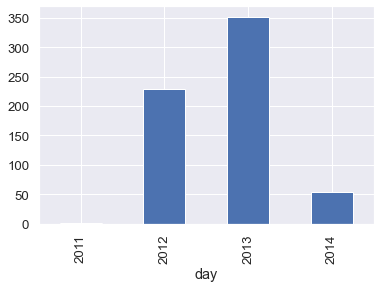

In [23]:
n_homes =5550  # Number of unique homes in the dataset

(home_joined.groupby([home_joined['day'].dt.year]).count()/n_homes)['energy_mean'].plot(kind="bar")


In [24]:
tempforecast = tempforecast.loc[tempforecast.time.dt.year == 2013]
home_joined = home_joined.loc[home_joined.day.dt.year == 2013]
tempforecast.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
10248,3.70,96,13.56,2013-09-23 23:00:00,12.98,1020.48,13.56,1.36,rain,clear-night,0.96,Clear
10249,2.99,97,12.81,2013-09-24 00:00:00,12.27,1020.08,12.81,0.84,rain,fog,0.97,Foggy
10250,2.16,113,12.19,2013-09-24 01:00:00,11.64,1019.78,12.19,0.44,rain,fog,0.96,Foggy
10251,2.03,84,12.11,2013-09-24 02:00:00,11.54,1019.48,12.11,0.54,rain,fog,0.96,Foggy
10252,1.17,93,12.02,2013-09-24 03:00:00,11.71,1018.73,12.02,0.92,rain,fog,0.98,Foggy


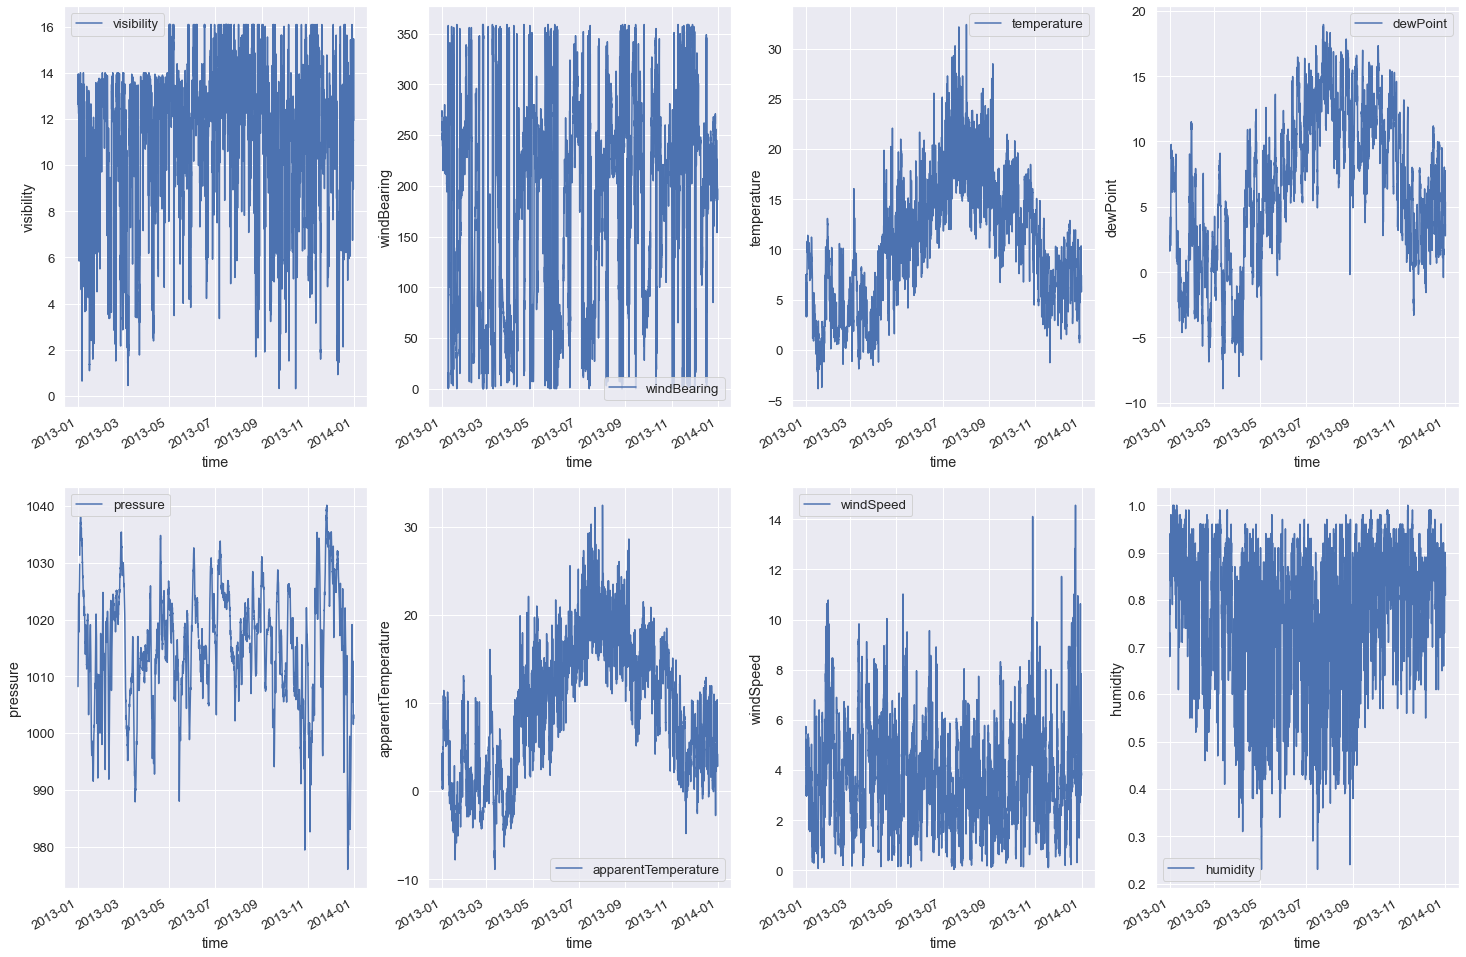

In [25]:
numerical = tempforecast.columns.drop(['time','icon','precipType','summary'])
categorical = ['icon','summary','precipType']

fig,ax = plt.subplots(2,4,figsize = (25,18))
axs = ax.ravel()

for i, feature in enumerate(numerical):
    tempforecast.plot('time',feature, ax=axs[i])
    axs[i].set_ylabel(feature)

Text(0.5, 1.0, 'Average Hourly Variability of Predicted Variables')

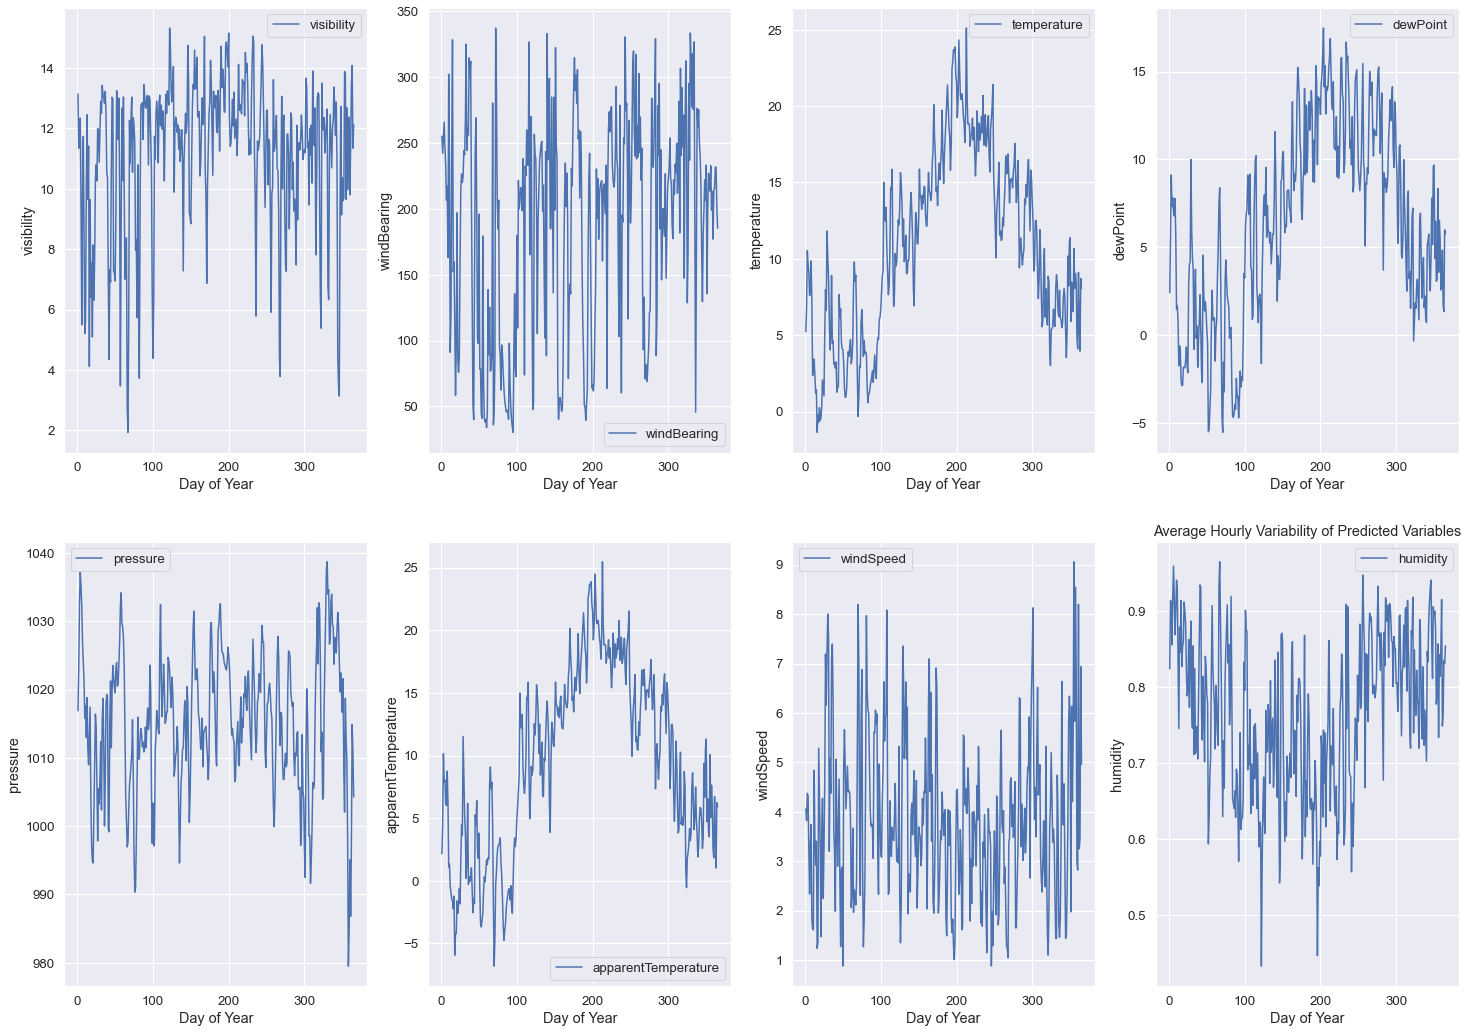

In [26]:
fig,ax = plt.subplots(2,4,figsize = (25,18))
axs = ax.ravel()

for i, feature in enumerate(numerical):
    tempforecast.groupby(tempforecast['time'].dt.dayofyear).mean().reset_index().plot('time',feature, ax=axs[i])
    axs[i].set_ylabel(feature)
    axs[i].set_xlabel('Day of Year')
plt.title('Average Hourly Variability of Predicted Variables')

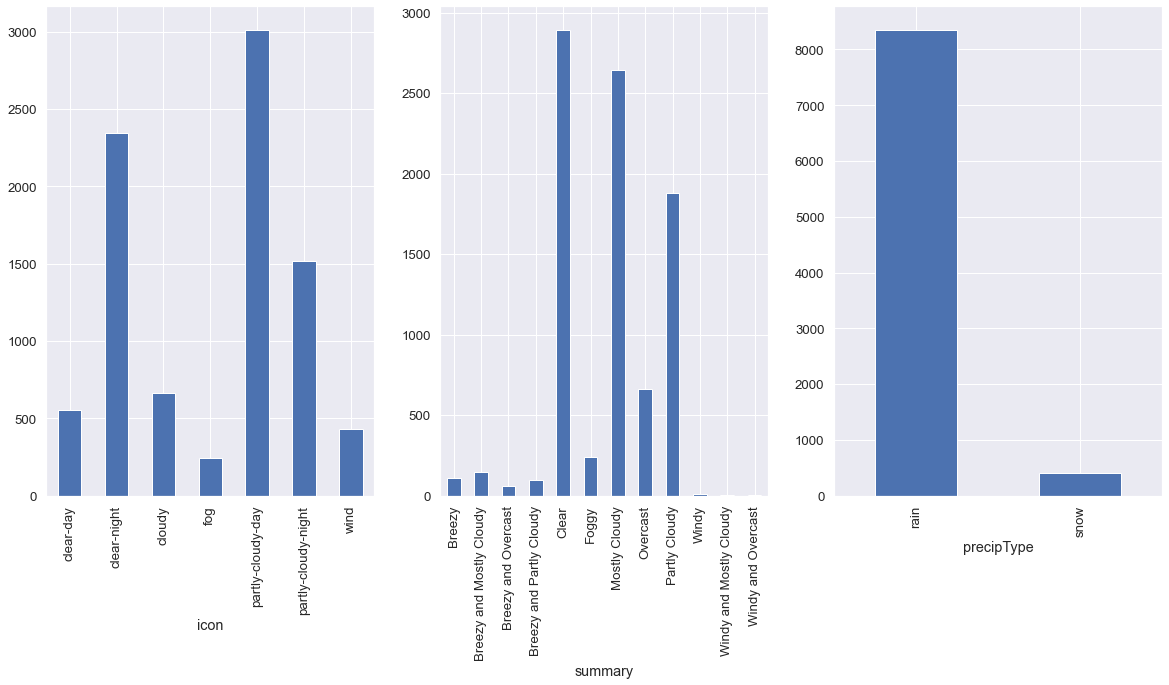

In [27]:
fig,ax = plt.subplots(1,3,figsize = (20,9))
for i,feature in enumerate(categorical):
    tempforecast.groupby(tempforecast[feature])[feature].count().plot(kind = 'bar', ax = ax[i])

<AxesSubplot:>

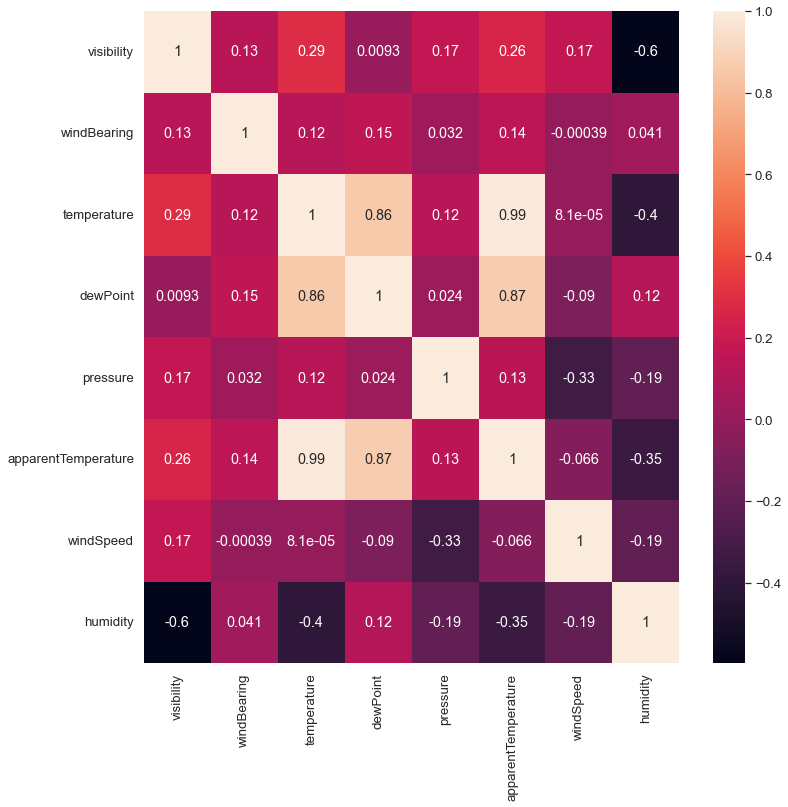

In [28]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(tempforecast.corr(), annot = True, ax = ax)

We can get ris of apparentTemperature as it is highly correlated with the temperature and provides no new information

In [29]:
tempforecast = tempforecast.drop(['apparentTemperature'],axis=1)

Joining temperature forecast and house data, when aggregating, the categorical variables are lost, to include them in the daily values we will take the most common category in each day

To test how well this aggregate function applied on the categorical data performs, we can compare the barplots with the previous barplots and see if the proportions remain the same

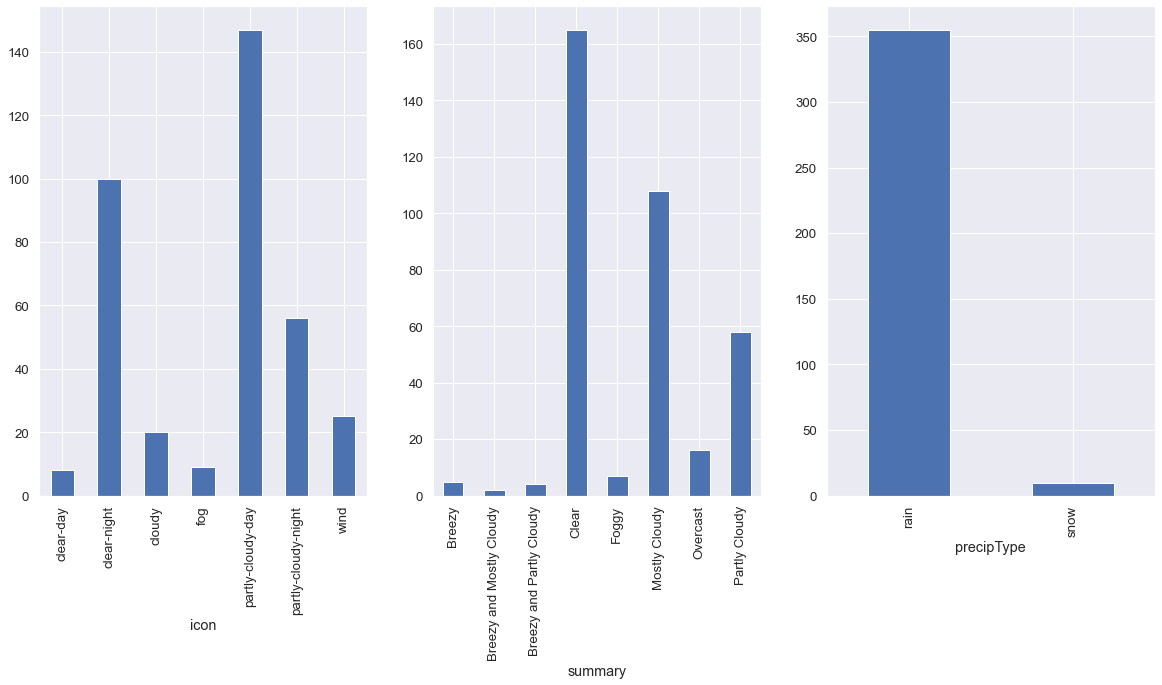

In [30]:
tempforecast_daily_categorical = tempforecast[categorical+['time']].groupby(tempforecast['time'].dt.dayofyear).agg(lambda x:x.value_counts().index[0])
fig,ax = plt.subplots(1,3,figsize = (20,9))
for i,feature in enumerate(categorical):
    tempforecast_daily_categorical.groupby(tempforecast_daily_categorical[feature])[feature].count().plot(kind = 'bar', ax = ax[i])

In [31]:
tempforecast_daily = tempforecast.groupby(tempforecast['time'].dt.dayofyear).mean()
tempforecast_daily = tempforecast_daily.join(tempforecast_daily_categorical).drop('time',axis=1)
tempforecast_daily.head()
tempforecast_daily=tempforecast_daily.reset_index().rename({'time':'dayno'},axis=1)


In [32]:
pd.set_option('display.max_columns', None)
print('Shape before Join = {}'.format(home_joined.shape))
home_joined['dayno'] = home_joined.day.dt.dayofyear
df = home_joined.merge(tempforecast_daily, how = 'left', on = 'dayno')
print('Shape after Join = {}'.format(df.shape))
df.head()

Shape before Join = (1952394, 13)
Shape after Join = (1952394, 24)


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file,dayno,visibility,windBearing,temperature,dewPoint,pressure,windSpeed,humidity,icon,summary,precipType
0,MAC000152,2013-01-01,0.1495,0.242333,1.032,48,0.210719,11.632,0.032,Std,ACORN-E,Affluent,block_24,1,13.140000,255.250000,5.222500,2.399583,1016.892917,4.059167,0.823750,partly-cloudy-night,Partly Cloudy,rain
1,MAC000152,2013-01-02,0.1325,0.195979,0.986,48,0.171915,9.407,0.037,Std,ACORN-E,Affluent,block_24,2,11.345417,242.250000,6.717917,5.403750,1023.114167,3.823750,0.913750,partly-cloudy-night,Mostly Cloudy,rain
2,MAC000152,2013-01-03,0.1265,0.224167,1.582,48,0.251876,10.760,0.032,Std,ACORN-E,Affluent,block_24,3,11.890000,254.541667,10.535833,9.114167,1032.614783,4.374583,0.909583,partly-cloudy-night,Mostly Cloudy,rain
3,MAC000152,2013-01-04,0.1240,0.192792,0.524,48,0.140417,9.254,0.032,Std,ACORN-E,Affluent,block_24,4,12.338750,265.875000,9.641667,7.310833,1037.149167,4.317083,0.855417,partly-cloudy-night,Mostly Cloudy,rain
4,MAC000152,2013-01-05,0.1950,0.262250,1.285,48,0.220509,12.588,0.042,Std,ACORN-E,Affluent,block_24,5,9.577917,247.375000,9.112500,7.823333,1035.157917,3.245000,0.917917,partly-cloudy-night,Mostly Cloudy,rain


[Text(0, 0, '(ACORN-, ACORN-)'),
 Text(1, 0, '(ACORN-U, ACORN-U)'),
 Text(2, 0, '(Adversity, ACORN-K)'),
 Text(3, 0, '(Adversity, ACORN-L)'),
 Text(4, 0, '(Adversity, ACORN-M)'),
 Text(5, 0, '(Adversity, ACORN-N)'),
 Text(6, 0, '(Adversity, ACORN-O)'),
 Text(7, 0, '(Adversity, ACORN-P)'),
 Text(8, 0, '(Adversity, ACORN-Q)'),
 Text(9, 0, '(Affluent, ACORN-A)'),
 Text(10, 0, '(Affluent, ACORN-B)'),
 Text(11, 0, '(Affluent, ACORN-C)'),
 Text(12, 0, '(Affluent, ACORN-D)'),
 Text(13, 0, '(Affluent, ACORN-E)'),
 Text(14, 0, '(Comfortable, ACORN-F)'),
 Text(15, 0, '(Comfortable, ACORN-G)'),
 Text(16, 0, '(Comfortable, ACORN-H)'),
 Text(17, 0, '(Comfortable, ACORN-I)'),
 Text(18, 0, '(Comfortable, ACORN-J)')]

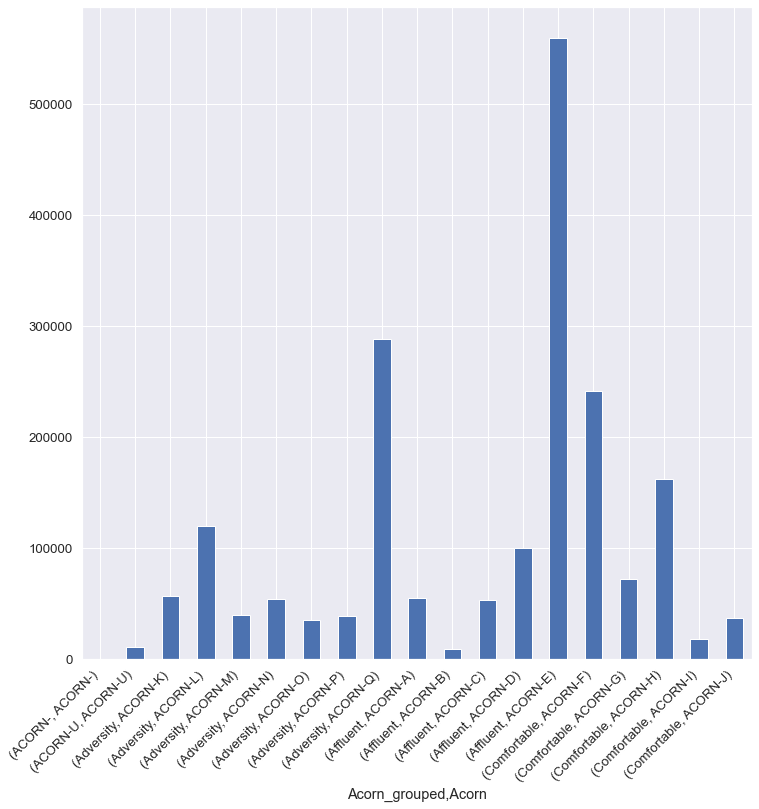

In [33]:
fig, ax = plt.subplots(figsize= (12,12))
bp = df.groupby(['Acorn_grouped','Acorn']).count()['LCLid'].plot(ax=ax,kind = 'bar')
bp.set_xticklabels(bp.get_xticklabels(), 
      rotation=45, 
      horizontalalignment='right')

In [34]:
df = df[~df['Acorn'].isin(['ACORN-','ACORN-U'])]

<AxesSubplot:xlabel='temperature', ylabel='energy_mean'>

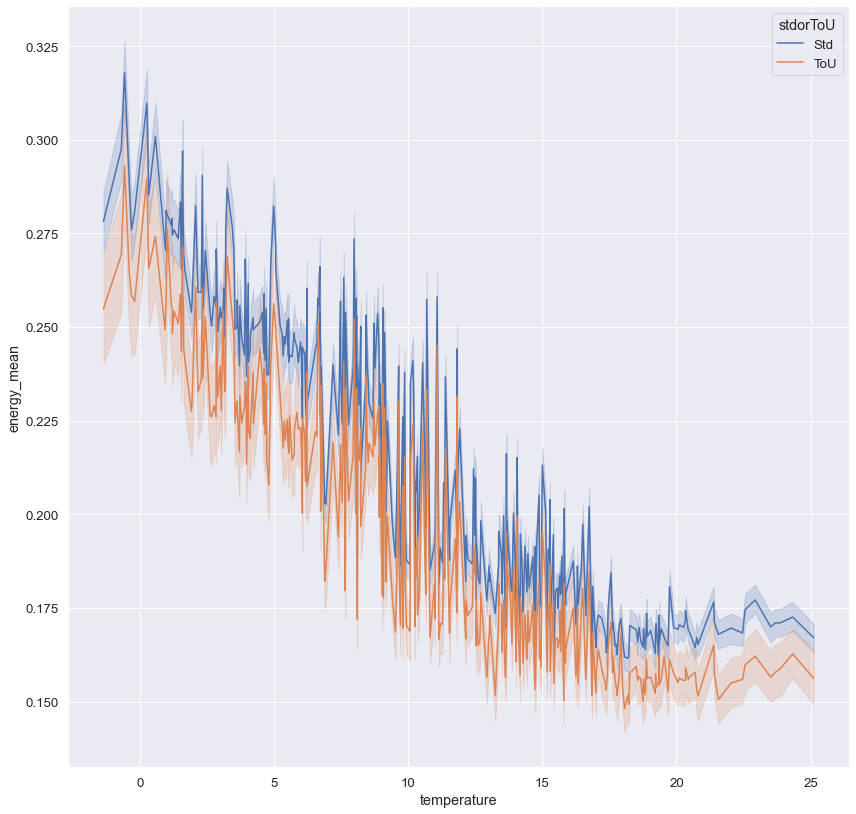

In [35]:
fig,ax = plt.subplots(figsize = (14,14))
sns.lineplot(x= 'temperature', y = 'energy_mean', hue = 'stdorToU', data = df, ax = ax)

Those on the standard subscription always consume more than those on the ToU subscription. And energy consumption levels drop significantly with temperature. There is also a clear cut-off, past which the energy consu,ption tails off.
How does this trend vary with Acorn group?
1. 

[Text(0.5, 0, 'Temperature'), Text(0, 0.5, 'Avg energy')]

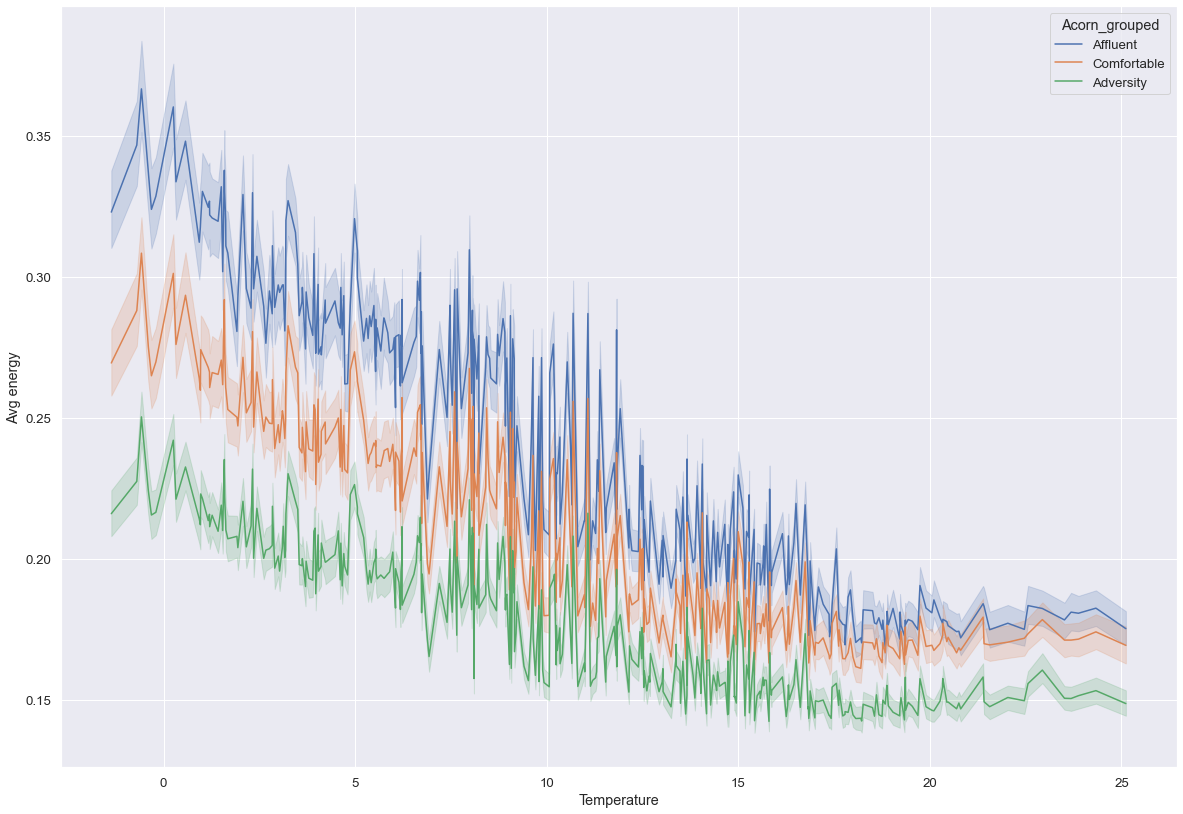

In [36]:
fig,ax = plt.subplots(figsize = (20,14))
ax=sns.lineplot(x= 'temperature', y = 'energy_mean', hue = 'Acorn_grouped', data = df, ax = ax)
ax.set(xlabel='Temperature', ylabel='Avg energy')

What other factors may affect the consumption?

<AxesSubplot:>

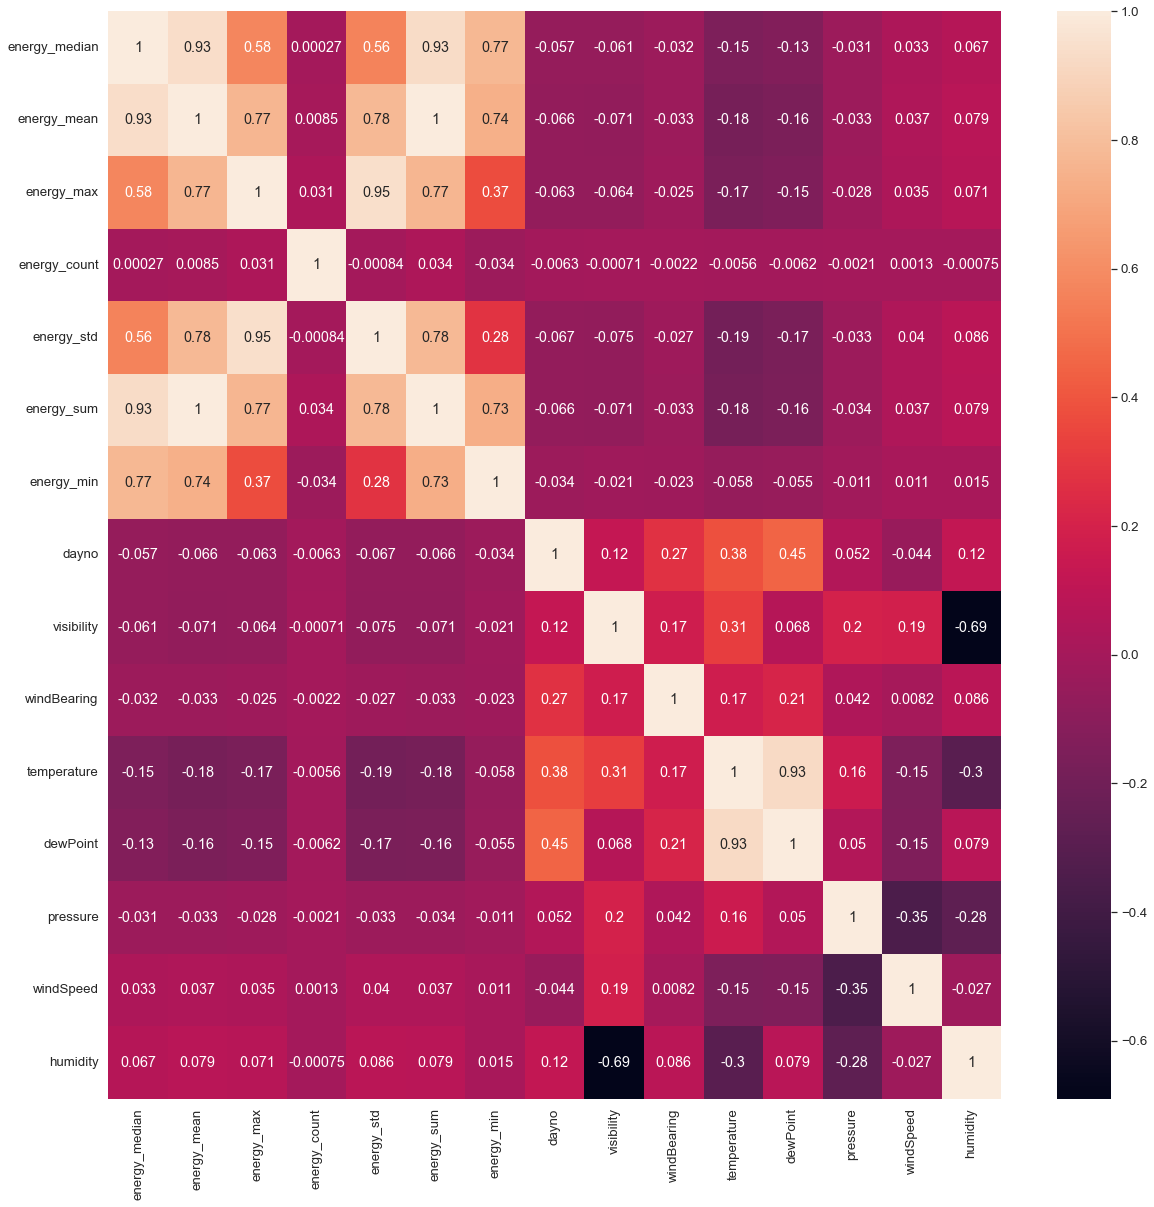

In [37]:
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),ax =ax, annot=True)

# Forecasting Model Iteration

In [38]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config


Import sklearn regression models

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Data cleaning

In [42]:
df1 = df[df.isna().any(axis=1)]
(df1['energy_max']-df1['energy_min']).sum()


0.0

In [43]:
df.loc[df['energy_std'].isna(),'energy_std']=0

In [44]:
df= df.dropna()

In [45]:
df.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file,dayno,visibility,windBearing,temperature,dewPoint,pressure,windSpeed,humidity,icon,summary,precipType
0,MAC000152,2013-01-01,0.1495,0.242333,1.032,48,0.210719,11.632,0.032,Std,ACORN-E,Affluent,block_24,1,13.140000,255.250000,5.222500,2.399583,1016.892917,4.059167,0.823750,partly-cloudy-night,Partly Cloudy,rain
1,MAC000152,2013-01-02,0.1325,0.195979,0.986,48,0.171915,9.407,0.037,Std,ACORN-E,Affluent,block_24,2,11.345417,242.250000,6.717917,5.403750,1023.114167,3.823750,0.913750,partly-cloudy-night,Mostly Cloudy,rain
2,MAC000152,2013-01-03,0.1265,0.224167,1.582,48,0.251876,10.760,0.032,Std,ACORN-E,Affluent,block_24,3,11.890000,254.541667,10.535833,9.114167,1032.614783,4.374583,0.909583,partly-cloudy-night,Mostly Cloudy,rain
3,MAC000152,2013-01-04,0.1240,0.192792,0.524,48,0.140417,9.254,0.032,Std,ACORN-E,Affluent,block_24,4,12.338750,265.875000,9.641667,7.310833,1037.149167,4.317083,0.855417,partly-cloudy-night,Mostly Cloudy,rain
4,MAC000152,2013-01-05,0.1950,0.262250,1.285,48,0.220509,12.588,0.042,Std,ACORN-E,Affluent,block_24,5,9.577917,247.375000,9.112500,7.823333,1035.157917,3.245000,0.917917,partly-cloudy-night,Mostly Cloudy,rain


In [46]:
y = df.energy_mean
predictor_cols = ['temperature']
X = df[predictor_cols]


In [47]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
print('Mean Squared Error = {:.2f}'.format(results.mse_model))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            energy_mean   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                 6.547e+04
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:45:13   Log-Likelihood:             4.9129e+05
No. Observations:             1940970   AIC:                        -9.826e+05
Df Residuals:                 1940968   BIC:                        -9.826e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2724      0.000    986.190      

# Pipeline & Feature Selection

In [48]:
dfsmall = df.sample(frac=0.01)
predictor_cols = ['dayno','visibility','windBearing','temperature','dewPoint','pressure','windSpeed','humidity','stdorToU','Acorn','summary','precipType']

X = dfsmall[predictor_cols]
y = dfsmall['energy_mean']


numerical_features = ['dayno','visibility','windBearing','temperature','dewPoint','pressure','windSpeed','humidity']
categorical_features = ['stdorToU','summary','precipType']
ordinal_features = ['Acorn'] 


In [49]:
def build_pipeline(numerical_features, categorical_features, ordinal_features):
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    ordinal_transformer = OrdinalEncoder()

    preprocessor = ColumnTransformer( # Transform respective columns using column transformer
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('ord', ordinal_transformer, ordinal_features)
        ])

    rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=4)


    regressorpipe = Pipeline(steps=[('preprocessor', preprocessor), ('feature_selection', rfe),
                          ('regressor', RandomForestRegressor())])
    return rfe, regressorpipe

rfe, regressor = build_pipeline(numerical_features, categorical_features, ordinal_features)

X_new = regressor.fit(X, y)



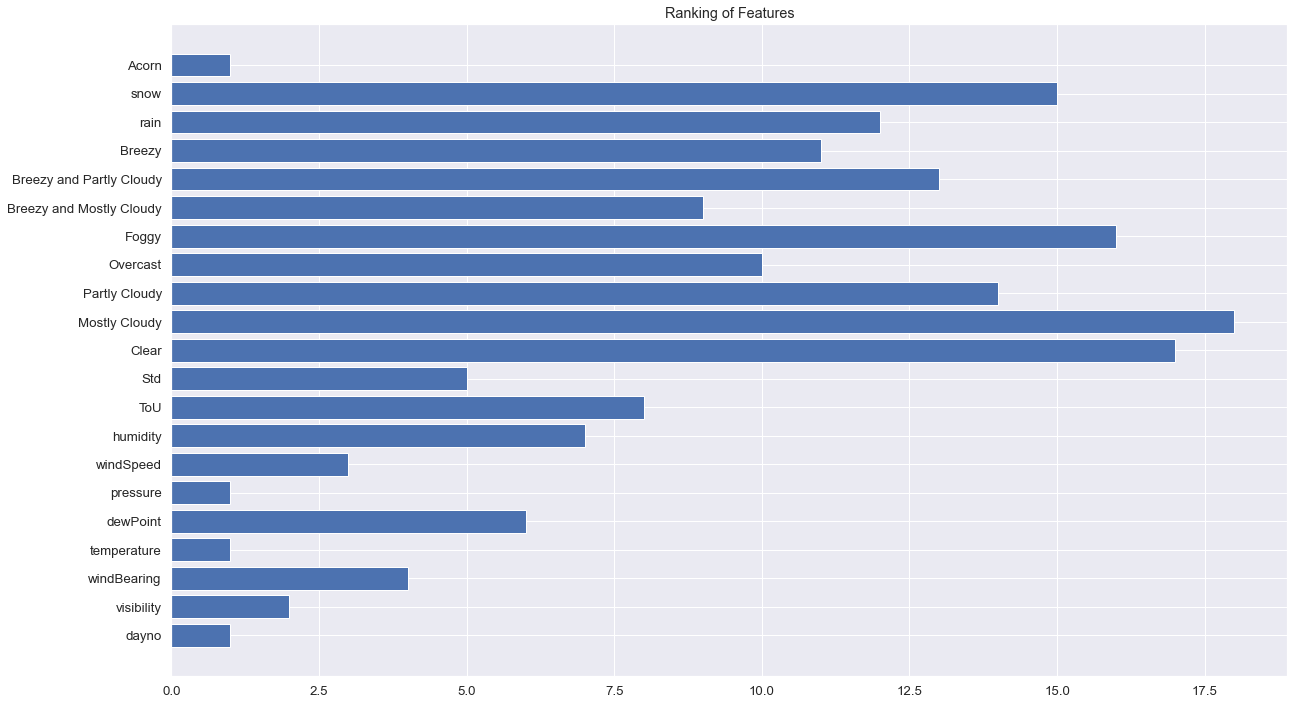

In [50]:
def visualization_plot(RFE):
    columns = numerical_features +list(X['stdorToU'].unique()) +list(X['summary'].unique())+list(X['precipType'].unique()) +['Acorn']
    fig, ax = plt.subplots(figsize = (20,12))
    x = np.arange(len(columns))  # the label locations
    ax.barh(x, RFE.ranking_)
    ax.set_yticks(x)
    ax.set_yticklabels(columns)
#     plt.xticks(rotation=90)
    ax.set_title('Ranking of Features')

visualization_plot(rfe)